In [76]:
import pandas as pd
import numpy as np
df = pd.read_csv("city1.csv", delimiter=r"\s+")
df.shape

(1000, 11)

In [77]:
df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [78]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [79]:
for x in ['Average_Fare','Distance','Average_weekly_passengers','market_share','Average_fare','market_share.1','price']:
    df = df.sort_values([x], ascending=[True])
    df = remove_outlier(df,x)
    print(df.shape)

(985, 11)
(981, 11)
(904, 11)
(904, 11)
(901, 11)
(901, 11)
(877, 11)


In [89]:
import matplotlib.pyplot as plt

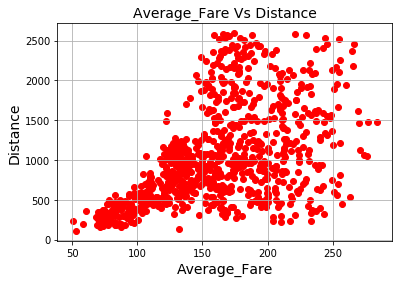

In [90]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], color='red')
plt.title('Average_Fare Vs Distance', fontsize=14)
plt.xlabel('Average_Fare', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.grid(True)
plt.show()

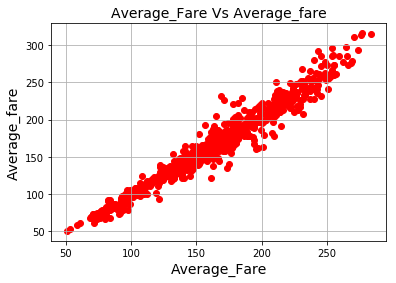

In [91]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], color='red')
plt.title('Average_Fare Vs Average_fare', fontsize=14)
plt.xlabel('Average_Fare', fontsize=14)
plt.ylabel('Average_fare', fontsize=14)
plt.grid(True)
plt.show()

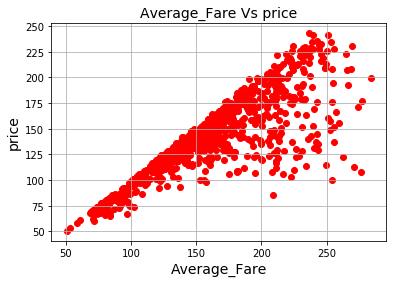

In [92]:
plt.scatter(df.iloc[:,0],df.iloc[:,3], color='red')
plt.title('Average_Fare Vs price', fontsize=14)
plt.xlabel('Average_Fare', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()

In [80]:
df.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share.1,price
Average_Fare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
Average_weekly_passengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
market_share,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
Average_fare,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
market_share.1,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


In [81]:
df = df.drop(['City1', 'City2', 'Average_weekly_passengers','market_leading_airline','market_share','Low_price_airline','market_share.1'], axis=1)

In [82]:
df.head()

,Average_Fare,Distance,Average_fare,price
660,50.52,231,50.52,50.52
704,52.99,108,52.99,52.99
674,58.45,197,58.13,58.13
867,71.27,342,60.55,60.55
699,61.02,353,61.02,61.02


In [85]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df.iloc[:,[1,2,3]]
Y = df.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 7.184527796328069
Coefficients: 
 [0.00170804 0.76609928 0.19038304]


In [87]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = regr.predict(X_test)
print('R Square Score for test set:',metrics.r2_score(Y_test, y_pred))

R Square Score for test set: 0.963794505994911
